In [3]:
import numpy as np
import pandas as pd
from scipy import stats, linspace
from statsmodels.stats import power
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline
import utils
# jupyter lab configs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.float_format', lambda x: '%.2f' % x)

/Users/aline.ferreira-de-qu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# STATISTICS (applied to data science)

## These exercises are meant to complement the content given in the pdf

# Exercise 1 - Summary statistics

Implement code for the functions below. In each function, make sure you call the function written before. 

In [ ]:
def mean():
    pass

def sum_squares():
    pass

def mse():
    # mean squared error
    pass

def rmse():
    # rooted mean squared error
    pass

def variance():
    pass

def std_dev():
    pass

def std_error():
    pass

def confidence_95():
    pass
    
def covariance():
    pass

def coeficient_variation():
    pass
  
def cov():
    pass

def z_score():
    pass

# Data transformations

The function below plots the diagnostic plots **QQ Plots** for two sets of variables, like raw (unstransformed) and transformed data, for comparison. 

In [ ]:
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

def plot_compare_transformations(raw_data, transformed_data, transformation_used):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    prob = stats.probplot(raw_data, dist=stats.norm, plot=ax1)
    ax1.set_xlabel('')
    ax1.set_title('Probplot against the normal distribution (line) ')
    ax2 = fig.add_subplot(212)
    prob = stats.probplot(transformed_data, dist=stats.norm, plot=ax2)
    ax2.set_title('Probplot after ' + transformation_used + ' transformation')
    plt.show()

### Example: 
Try **box-cox** (available in **scipy**)

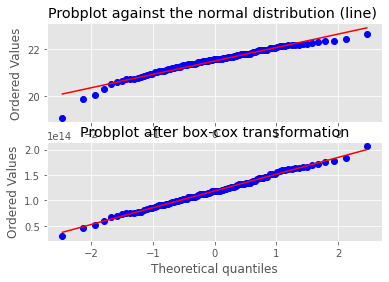

In [286]:
# generate some data with noise
raw_data = stats.loggamma.rvs(5, size=100) + 20
weird_distr_data = [1,1,1,1,1,1,1,7]
# apply box-cox
transformed_data, _ = stats.boxcox(raw_data)
# plot and compare 
plot_compare_transformations(raw_data, transformed_data, 'box-cox')

Now let's see the same effect in numbers:

Example with shapiro's test:

In [ ]:
print('Test of normal distribution with Shapiros Test')
print('stat:', stats.shapiro(raw_data)[0],'p-value:', stats.shapiro(raw_data)[1])

In [ ]:
print('Test of normal distribution with Shapiros Test')
print('stat:', stats.shapiro(transformed_data)[0],'p-value:', stats.shapiro(transformed_data)[1])

In [ ]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(raw_data)
lzip(name, test)
test = sms.jarque_bera(transformed_data)
lzip(name, test)

Try generating more sets of variables and applying other transformations, always inspecting the effect with QQ-plots and/or tests  

`x = np.random.normal(0, 1, 500)`

# Data standardization

## Z-scores  
`scipy.stats.zscore()`

In [ ]:
stats.norm.sf(0)

Observe the properties of a Normal Distribution. Then change the mean and std and see what happens:

In [4]:
def norm_cdf(mean=0.0, std=1.0):
    # 50 numbers between -3σ and 3σ
    x = linspace(-3*std, 3*std, 50)
    # CDF at these values
    y = stats.norm.cdf(x, loc=mean, scale=std)
    plt.ylabel("Cumulative Probability")
    plt.title("Cum. Dist. for Gaussian of mean = {0} | std. dev. = {1}".format(
               mean, std))
    plt.plot(x,y, color="black")
    plt.xlabel("Variate")
    plt.draw()

/Users/aline.ferreira-de-qu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  This is separate from the ipykernel package so we can avoid doing imports until


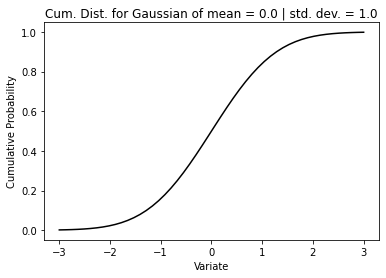

In [5]:
norm_cdf()

In [ ]:
norm_cdf(mean=3, std=1.0)

What is the percentage of the curve lower than the mean minus 3 deviations?

In [ ]:
stats.norm.cdf(-3)

What is the percentage of the curve lower than the mean plus 2 sd?

In [ ]:
stats.norm.cdf(2)

What is the percentage of the curve ABOVE the mean plus 2 sd?

## Exercise 4 - Inference and hypothesis testing

Write your own t-test for two independent samples (or an F-test, if you prefer) and calculate the p-value of the statistic

In [ ]:
def a_ttest(x, y):
    # 
    #
    #
    #
    #
    return t, p_value

## Exercise 5 - Effect sizes and Power tests

Cohens's D

In [ ]:
# calculate the Cohen's d between two samples
from numpy.random import randn
from numpy.random import seed
 
# function to calculate Cohen's d for independent samples
def cohen_d(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples - Which variance (biased or unbiased) is being used here?
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s
 
# seed random number generator
seed(1)
# prepare data
data1 = 10 * randn(10000) + 50
data2 = 10 * randn(10000) + 100
# calculate cohen's d
d = cohend(data1, data2)
print('Cohens d: %.3f' % d)

### POWER tests with *statsmodels*

**For a 2-sample test:**


`statsmodels.stats.power.tt_ind_solve_power(effect_size=None, nobs1=None, alpha=None, power=None, ratio=1.0, alternative='two-sided')`  


Here `effect size` means the standardized effect size, i. e., the diference between the two means divided by the standard deviation.  


You can solve for one of the desired parameters `effect_size`, `nobs1`, `alpha`, or `power`

What is the number of samples required to detect an effect size of 1, given alpha=0.05 and power of 0.8?

In [300]:
power.tt_ind_solve_power(effect_size=2, nobs1=None, alpha=0.05, power=0.80, ratio=1.0, alternative='two-sided')

5.089994609324709

In [295]:
power.tt_ind_solve_power(effect_size=None, nobs1=100, alpha=0.05, power=None, ratio=1.0, alternative='two-sided')

0.15839094415055668

In [ ]:
power.tt_ind_solve_power(effect_size=1, nobs1=None, alpha=0.05, power=0.80, ratio=1.0, alternative='two-sided')

What happens if we want to have more power in the test? (increase to 0.9)

In [ ]:
power.tt_ind_solve_power(effect_size=1, nobs1=None, alpha=0.05, power=0.90, ratio=1.0, alternative='two-sided')

In [ ]:
power.tt_ind_solve_power(effect_size=0.5, nobs1=30, alpha=0.05, power=None, ratio=1.0, alternative='two-sided')

# RESAMPLING and bootstrap

### Rewrite the t-test function you created and use bootstrapping to estimate the  p-value 

In [ ]:
def bootstrapped_ttest():
    pass

---

# Exercise 7 - Model evaluation

I'm training a model to predict the daily sales of PARFUM and MAKE_UP.  
The overall error (I chose the metric MAE) of the model is 305 orders per day. But when analized the MAE by clusters, I got 270 (s.d.=23) for PARFUM and 338 (s.d.=80) for MAKE-UP. Is this model statistically performing worse for MAKE_UP? How do you answer this question?

# Exercises

## Get familiar with Statsmodels

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Get a list of available built-in datasets:

In [ ]:
dir(sm.datasets)

Load a dataset as Pandas dataframe:

In [ ]:
data = sm.datasets.co2.load_pandas()
data.data.head(4)

In [ ]:
df = data.data.reset_index()
df['YEAR'] = pd.to_datetime(df['index']).dt.year
df.describe()

### Setup and fit the model (simple OLS)

In [ ]:
mod = smf.ols(formula='co2 ~ YEAR', data=df) # Describe a simple univariate linear regression
res = mod.fit()                              # Fit model
print(res.summary())                         # Summarize model

What is the CO2 concentration estimated by the model for 1996?  
How different is it from the average of that year (hint: use `pd.groupby()`)

Refit the model after log-transformation of variables.  
What changes?

In [ ]:
df2 = df.copy()
df2['co2'] = np.log10(df2['co2'])
df2['YEAR'] = np.log10(df2['YEAR'])

mod = smf.ols(formula='co2 ~ YEAR', data=df2) # Describe a simple univariate linear regression
res = mod.fit()                              # Fit model
print(res.summary()) 

### Error metrics
What are the appropriate error metrics for the evaluation of this model?
How would you calculate them?